In [1]:
import NeuralNetwork as nnw
import numpy as np
import matplotlib.pyplot as plt

In [2]:
red_chimba = nnw.crear_modelo_de_red([2, 5, 1])
X = np.array([
    [1, 1]])

pesos = red_chimba[0][0]
bias = red_chimba[0][1]
calculo_de_x = X.dot(pesos) + bias
activacion = nnw.sigmoide(calculo_de_x)
print(activacion.shape)
activacion =  (nnw.sigmoide(calculo_de_x) < 0.5)*1.0
pesos

(1, 5)


array([[ 0.03777246,  0.31242224,  0.39703327,  0.30629691, -0.17008445],
       [-0.74207929,  0.83439043,  0.79106593,  0.42956978,  0.38301563]])

In [3]:
arreglo_pesos = []
arreglo_activacion = []

salida_por_capa = np.array(X)
for i in range(len(red_chimba)):
    if i == 0:
        arreglo_activacion.append(np.ones(len(salida_por_capa[0])))
    pesos = red_chimba[i][0]
    bias = red_chimba[i][1]
    calculo_de_x = salida_por_capa.dot(pesos) + bias
    salida_por_capa =  (nnw.sigmoide(calculo_de_x) < 0.5)*1.0
    arreglo_pesos.append(pesos)
    arreglo_activacion.append(salida_por_capa)

arreglo_activacion[1][0]

array([1., 0., 0., 0., 1.])

In [4]:
arreglo_pesos

[array([[ 0.03777246,  0.31242224,  0.39703327,  0.30629691, -0.17008445],
        [-0.74207929,  0.83439043,  0.79106593,  0.42956978,  0.38301563]]),
 array([[ 0.08682651],
        [ 0.25932174],
        [-0.18281384],
        [ 0.67637708],
        [ 0.91578502]])]

In [5]:
[arreglo_activacion[i].shape for i in range(len(arreglo_activacion))]

[(2,), (1, 5), (1, 1)]

In [6]:
[arreglo_pesos[i].shape for i in range(len(arreglo_pesos))]

[(2, 5), (5, 1)]

### Probando la red con una compuerta XOR

100%|██████████| 10000/10000 [00:00<00:00, 15067.42it/s]


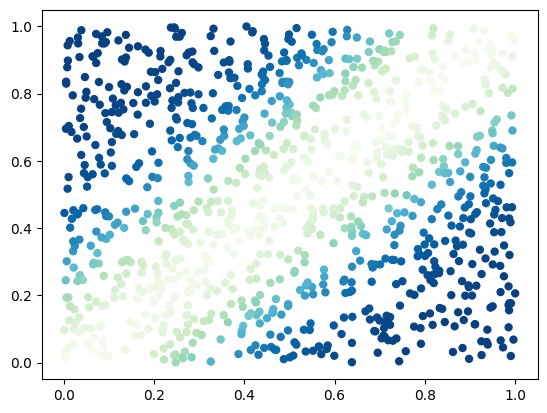

In [19]:
def random_points(n = 100):
    x = np.random.uniform(0, 1, n)
    y = np.random.uniform(0, 1, n)

    return np.array([x, y]).T

red_xor = nnw.crear_modelo_de_red([2,3, 1])

X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1],
])

Y = np.array([
    [0],
    [1],
    [1],
    [0],
])

red_entrenada = nnw.entrenar_red_neuronal(red_xor, nnw.tan_h, nnw.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=10000, tasa_de_aprendizaje=0.08)
# 
x_test = random_points(n = 1000)
y_test = nnw.predecir(x_test, red_entrenada, nnw.tan_h)

plt.scatter(x_test[:,0], x_test[:,1], c = y_test, s = 25, cmap='GnBu') # GnBu
plt.savefig('XOR_Fitted.jpg')

### Círculos

100%|██████████| 10000/10000 [00:02<00:00, 3450.19it/s]


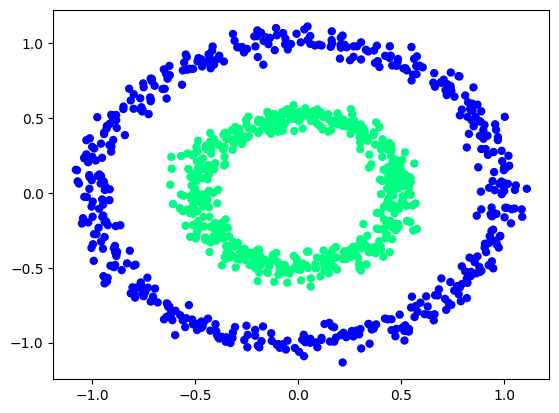

In [8]:
# CIRCLES
from sklearn.datasets import make_circles

red_circulos = nnw.crear_modelo_de_red([2, 4, 8, 1])

X, Y = make_circles(n_samples = 1000, noise = 0.05, factor = 0.5)
Y = Y.reshape(len(X), 1)
red_de_circulos_entrenada = nnw.entrenar_red_neuronal(red_circulos, nnw.sigmoide, nnw.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=10000, tasa_de_aprendizaje=0.05)
y_test = nnw.predecir(X, red_de_circulos_entrenada, nnw.sigmoide)
plt.scatter(X[:,0], X[:,1], c = y_test, cmap = 'winter', s = 25)

100%|██████████| 10000/10000 [00:02<00:00, 3457.95it/s]


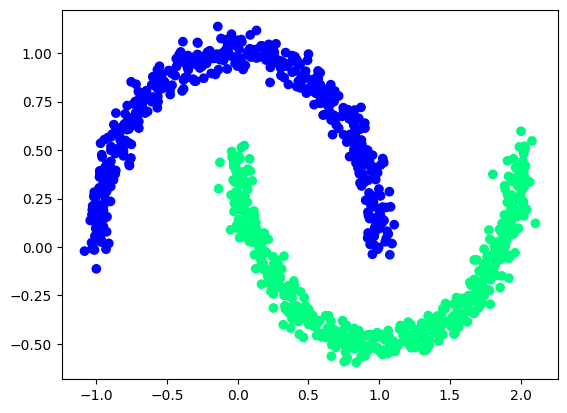

In [9]:
from sklearn.datasets import make_moons
red_lunas = nnw.crear_modelo_de_red([2, 4, 8, 1])

X, Y = make_moons(n_samples = 1000, noise = 0.05)
Y = Y.reshape(len(X), 1)
red_lunas_entrenada = nnw.entrenar_red_neuronal(red_lunas, nnw.sigmoide, nnw.mean_squared_error,valor_de_prediccion=X, valor_real=Y, epochs=10000, tasa_de_aprendizaje=0.05)

y_test = nnw.predecir(X, red_lunas_entrenada, nnw.sigmoide)
plt.scatter(X[:,0], X[:,1], c = y_test, cmap = 'winter')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import NeuralNetwork
from keras.datasets import mnist
from keras.utils import np_utils

red_neuronal_imagenes = NeuralNetwork.crear_modelo_de_red([784, 16, 10])

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')

# normalizamos las entradas desde 0-255 a 0-1
X_train = X_train / 255
X_test = X_test / 255

# una codificacion en caliente a la salida
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_train.shape[1]

print([X_train.shape, Y_train.shape])

2022-12-08 00:25:50.938776: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-08 00:25:51.170267: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 00:25:51.170317: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-08 00:25:51.216684: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-08 00:25:52.219450: W tensorflow/stream_executor/platform/de

[(60000, 784), (60000, 10)]


In [4]:
red_imagenes_entrenada = NeuralNetwork.entrenar_red_neuronal(red_neuronal_imagenes,NeuralNetwork.sigmoide,NeuralNetwork.mean_squared_error,valor_de_prediccion=X_train, valor_real=Y_train, epochs=15, tasa_de_aprendizaje=0.1)

100%|██████████| 15/15 [00:16<00:00,  1.07s/it]


In [7]:
# X test
image_to_predict = 0
print(Y_train[image_to_predict])
# y_reslt = NeuralNetwork.predecir(X_test[3].reshape(1, 784), red_entrenada, NeuralNetwork.sigmoide)
y_reslt = NeuralNetwork.predecir(X_train[image_to_predict], red_imagenes_entrenada, NeuralNetwork.sigmoide)
print(y_reslt)

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[0.00000000e+00 1.22705149e-30 8.75692540e-15 6.55593731e-06
  9.18522442e-86 1.01230615e-06 1.00000000e+00 1.00000000e+00
  5.44222619e-14 1.59610963e-48]]
